# Zad 3

# Wybierzemy 7 czyli color intensity

In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

In [43]:
wine = load_wine()
data = np.c_[wine.data, wine.target]
columns = np.append(wine.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
x = df['alcohol']
y = df['color_intensity']
print(f"X: {x}")
print(f"Y: {y}")

X: 0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64
Y: 0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64


In [52]:
# stworzenie "dziur" w danych
y_holed = y.mask(np.random.random(y.shape) < 0.3)

Text(0, 0.5, 'Intensywność_koloru')

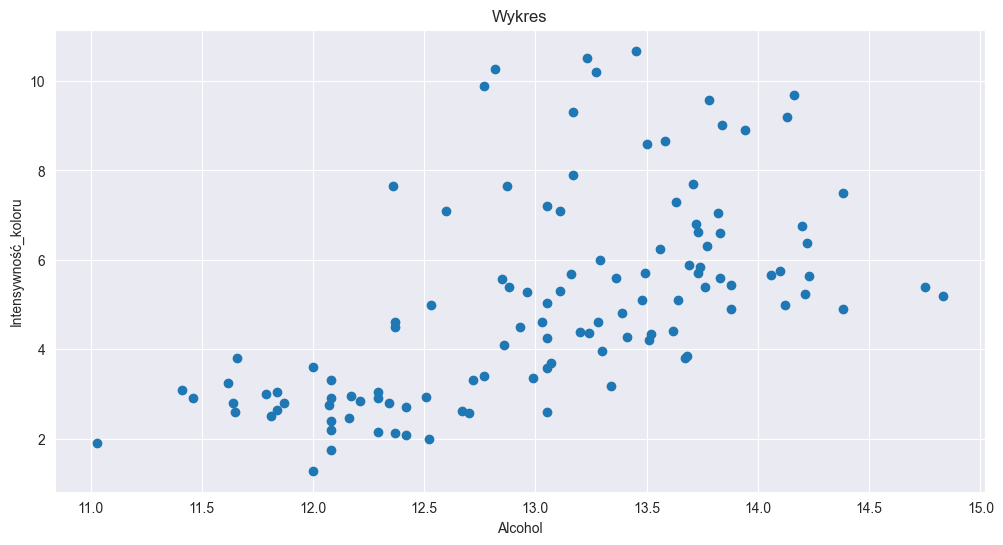

In [53]:
# Wizualizacja Danych
plt.figure(figsize=(12,6))
plt.scatter(x, y_holed)
plt.title('Wykres')
plt.xlabel('Alcohol')
plt.ylabel('Intensywność_koloru')

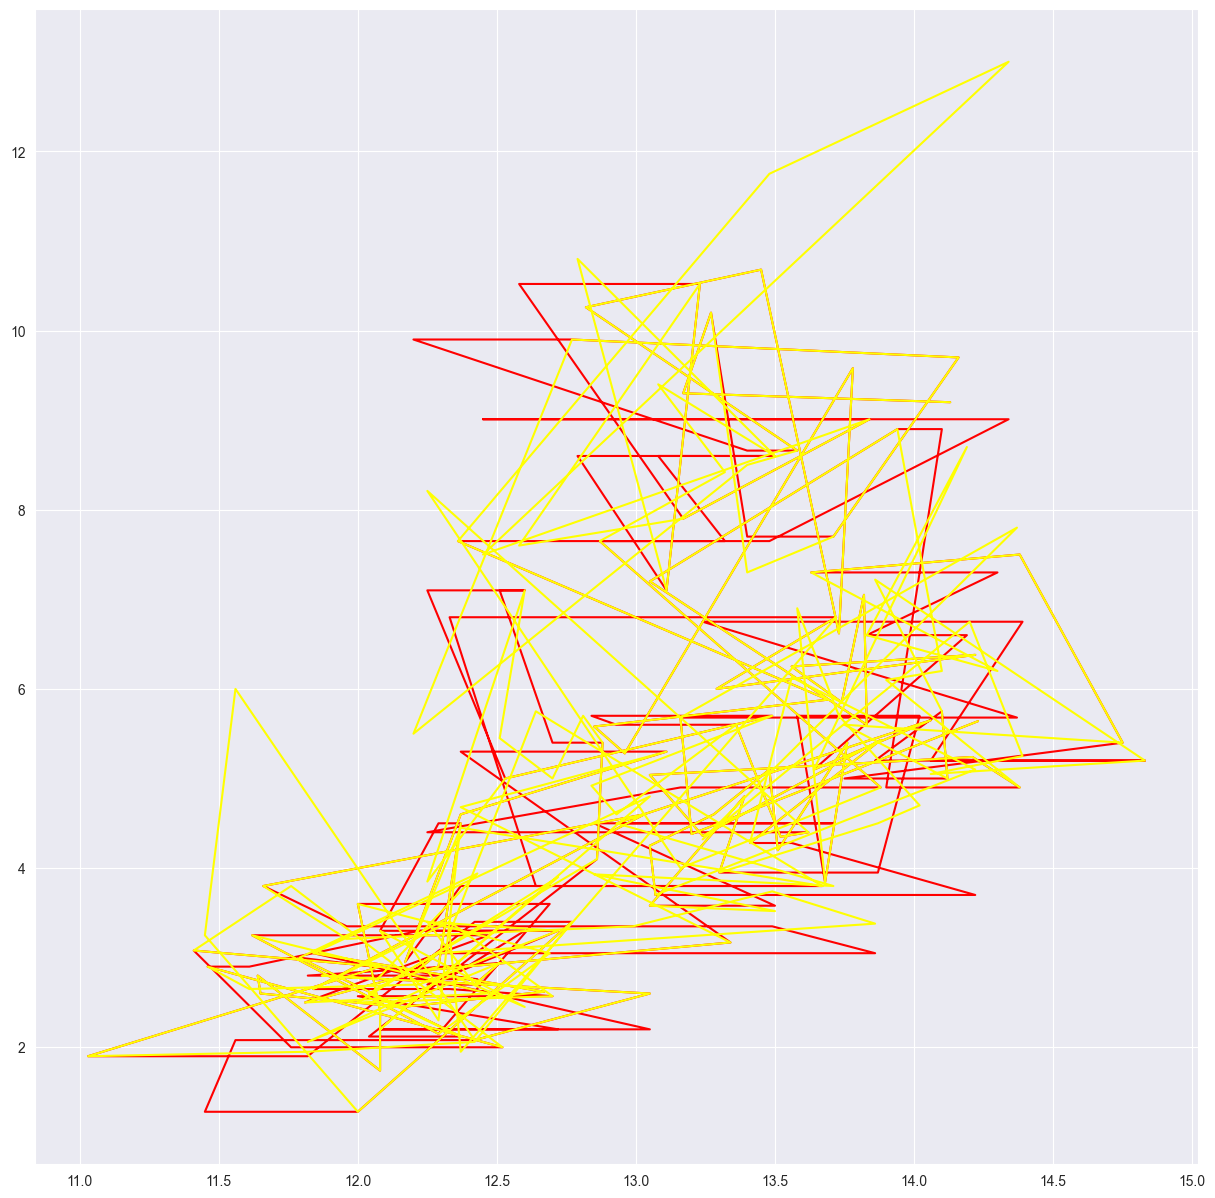

In [54]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
y_holed = y_holed.interpolate(method='nearest')
# Wizualizacja danych po interpolacji
plt.plot(x, y_holed, color='red')
plt.plot(x, y, color='yellow')

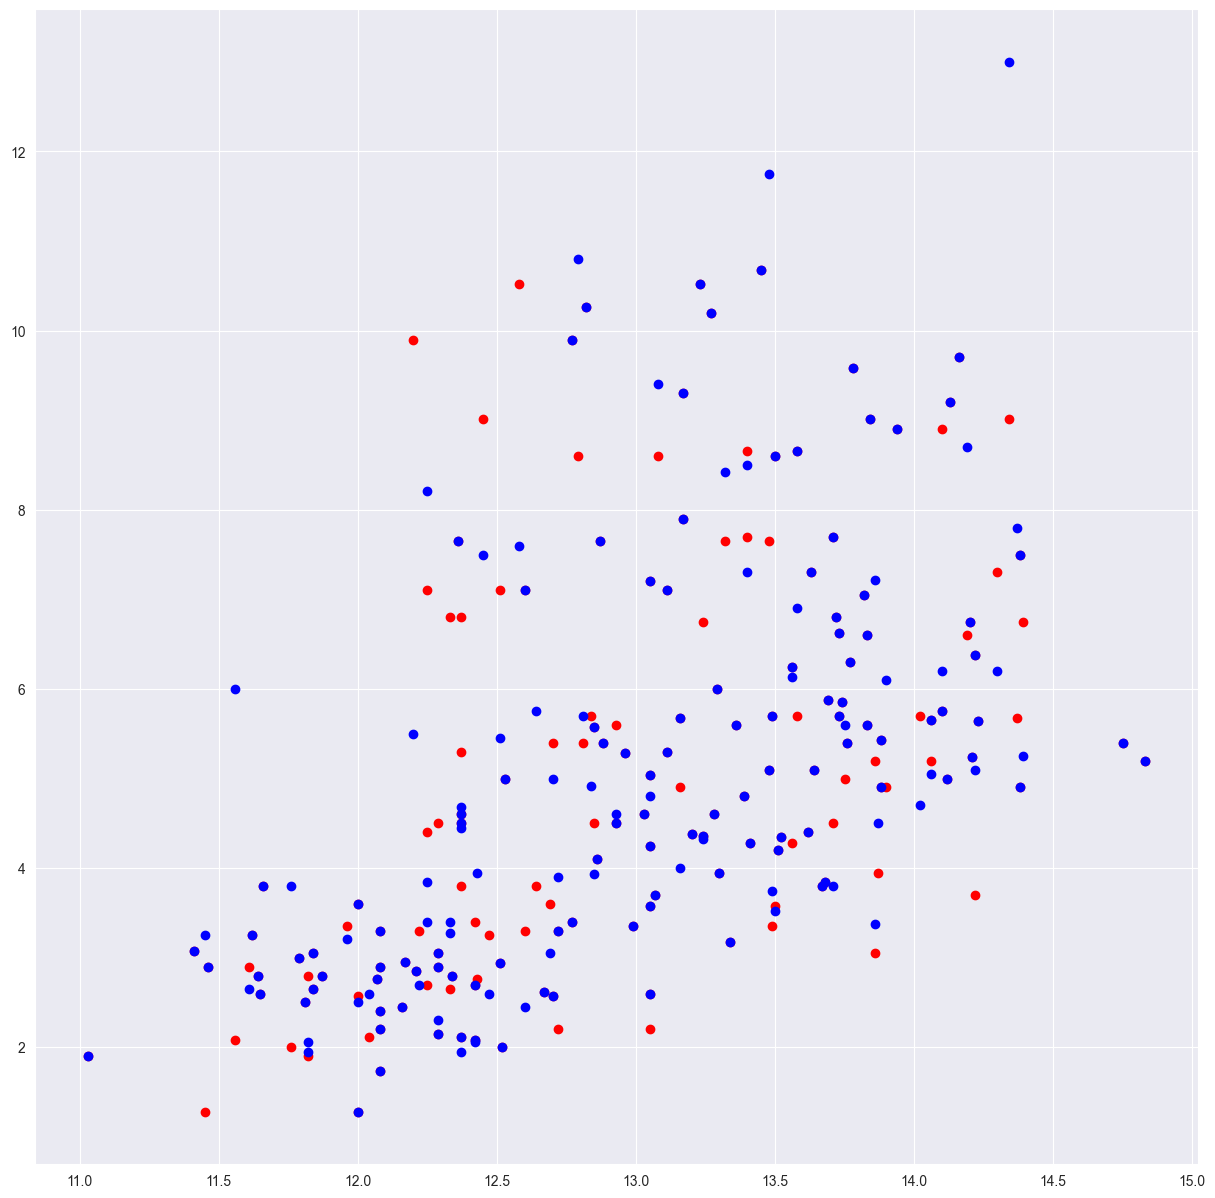

In [55]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
# Wizualizacja danych po interpolacji
plt.scatter(x, y_holed, color='red')
plt.scatter(x, y, color='blue')

In [56]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Obliczenie dokładności
print('Dokładność interpolacji Najbliższego sąsiada:', mean_squared_error(y_holed, y))

Dokładność interpolacji Najbliższego sąsiada: 1.2627915235955112


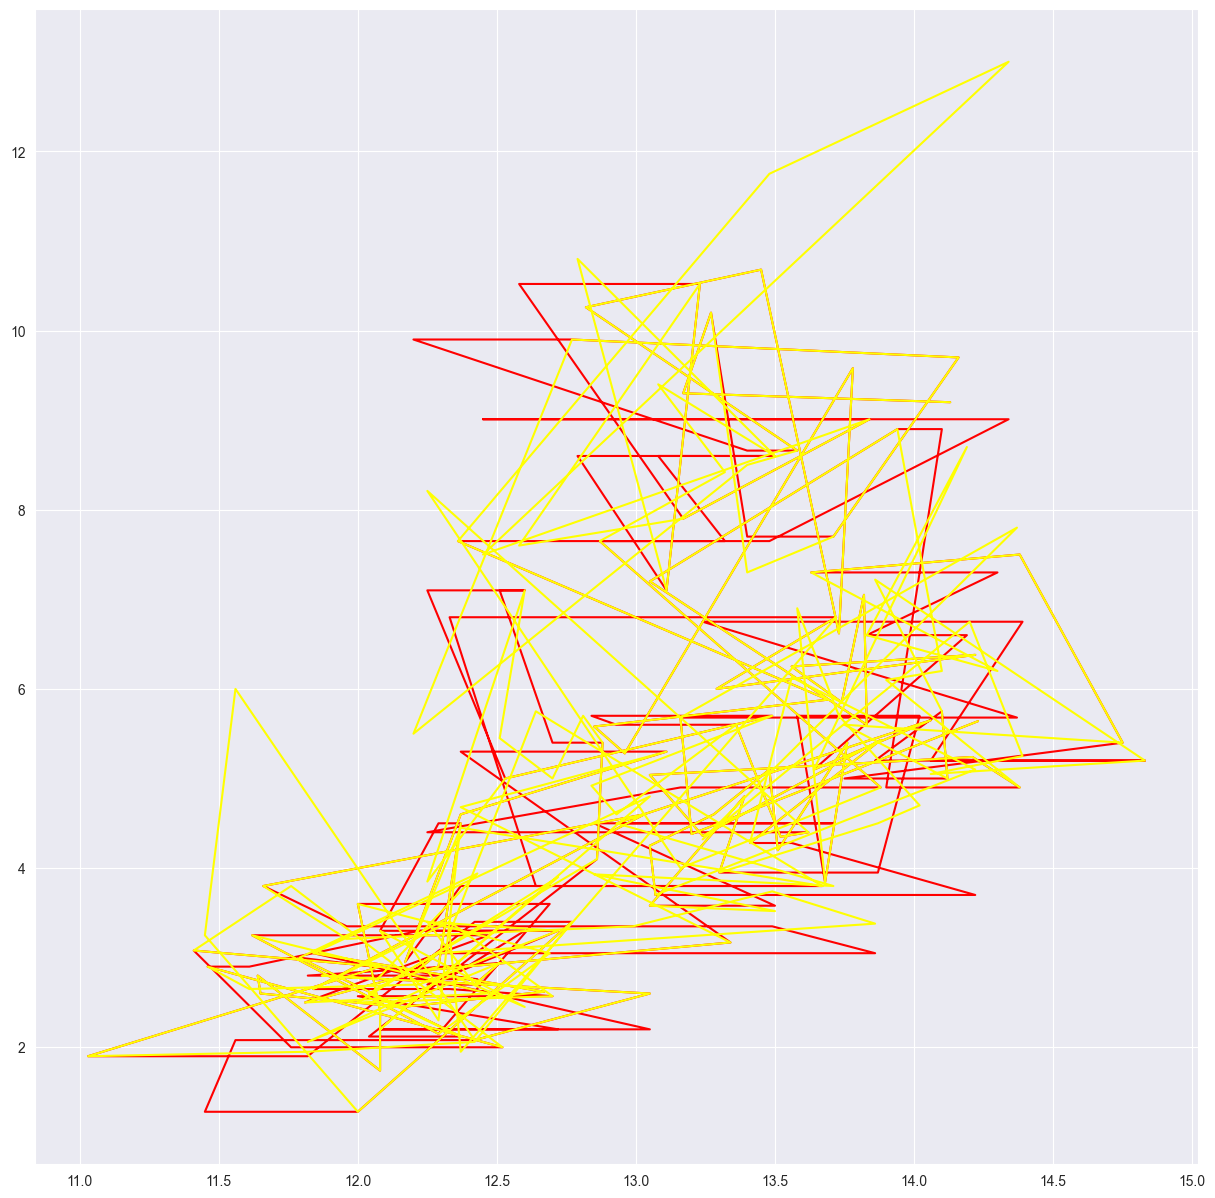

In [57]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
y_holed = y_holed.interpolate(method='cubicspline')
# Wizualizacja danych po interpolacji
plt.plot(x, y_holed, color='red')
plt.plot(x, y, color='yellow')

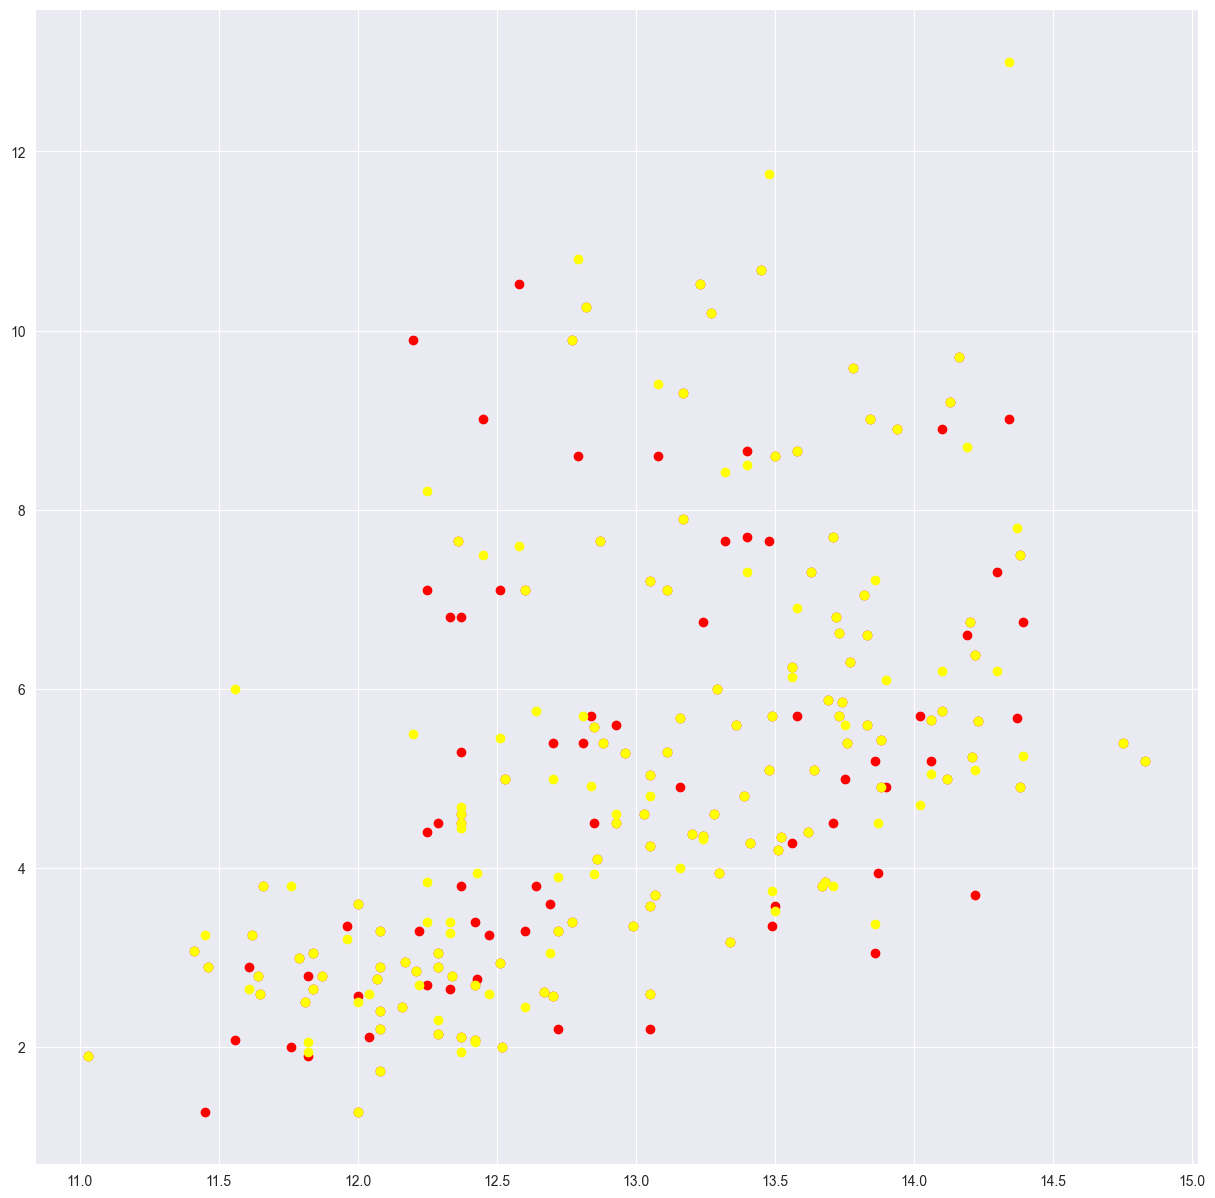

In [58]:
# Wizualizacja danych po interpolacji
plt.scatter(x, y_holed, color='red')
plt.scatter(x, y, color='yellow')

In [59]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Obliczenie dokładności
print('Dokładność interpolacji kubicznej:', mean_squared_error(y_holed, y))

Dokładność interpolacji kubicznej: 1.2627915235955112
